View in [nbviewer](http://nbviewer.jupyter.org/github/chidimo/ds/blob/master/coursera_matplotlib/Week2_solution.ipynb)

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d13/3f77d14c3d1fa1ac997d5414f38e394eeb9a734db495693c70daab1f.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

1. **id** : station identification code
1. **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
1. **element** : indicator of element type
1. **TMAX** : Maximum temperature (tenths of degrees C)
1. **TMIN** : Minimum temperature (tenths of degrees C)
1. **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Abu Dhabi, Abu Dhabi, United Arab Emirates**, and the stations the data comes from are shown on the map below.

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):
    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    station_locations_by_hash = df[df['hash'] == hashid]
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()
    plt.figure(figsize=(8,8))
    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    return mplleaflet.display()

leaflet_plot_stations(13,'3f77d14c3d1fa1ac997d5414f38e394eeb9a734db495693c70daab1f')

In [ ]:
from IPython.display import HTML
"""
The above function usually runs into an error, so we use this to download the file
This works only when notebook is running on coursera server
"""
target_file ='data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
link = '<a href="{0}" target = _blank>Click here to download {0}</a>'
HTML(link.format(target_file))

In [ ]:
from ..utils import 

<IPython.core.display.Javascript object>


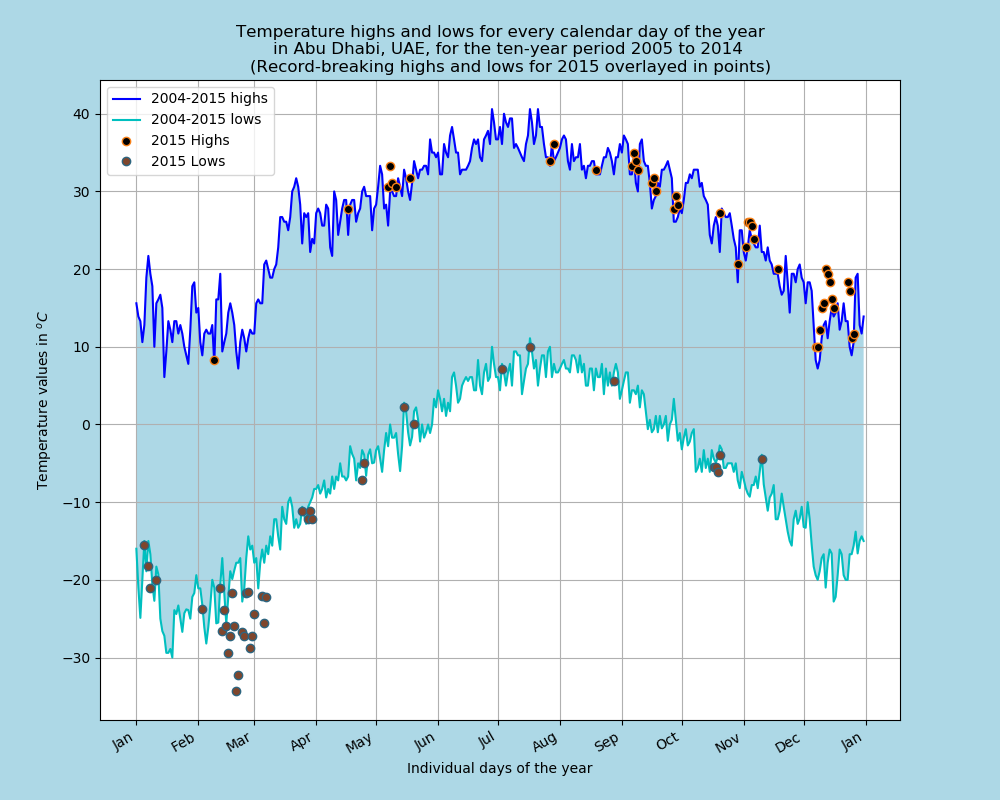

In [2]:
# %%file assignment_2_solution.py

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

def read_and_clean():
    """Read data and set index"""
    dff = pd.read_csv('assignment_data/weather_patterns.csv', index_col='Date')
    dff.Data_Value = dff.Data_Value/10

    # convert index to datetime
    dff.index = pd.to_datetime(dff.index)
    # remove leap days by masking

    to_drop = np.array([((each.day == 29) & (each.month == 2))  for each in dff.index])
    dff = dff[~to_drop]
    dff.sort_index(inplace=True)
    del dff['ID']
    return dff

def min_max(dff):
    """Separate the min and max readings"""
    maxxes = dff.loc[dff.Element == 'TMAX']
    minnies = dff.loc[dff.Element == 'TMIN']
    del maxxes['Element']
    del minnies['Element']
    return maxxes, minnies

def daily_maximums(dff, yrstart, yrend):
    """Single maximum value for each day"""
    dff = dff[(dff.index.year >= yrstart) & (dff.index.year < yrend)]
    new = pd.DataFrame(columns=['Value'])

    for idx, mdf in dff.groupby(by=dff.index.month): # pull common months

        for idxx, days in mdf.groupby(by=mdf.index.day): # pull common days

            maxi = days.Data_Value.max()
            index = days[days.Data_Value == maxi].index[0] # take only one index
            new.loc[index] = maxi
    return new

def daily_minimums(dff, yrstart, yrend):
    """Single maximum value for each day"""
    dff = dff[(dff.index.year >= yrstart) & (dff.index.year < yrend)]
    new = pd.DataFrame(columns=['Value'])

    for idx, mdf in dff.groupby(by=dff.index.month):

        for idxx, days in mdf.groupby(by=mdf.index.day):

            maxi = days.Data_Value.min()
            index = days[days.Data_Value == maxi].index[0]
            new.loc[index] = maxi
    return new

def dataframes_for_plot():
    """All dataframes needed for the plot"""
    dff = read_and_clean()
    min_max_parts = min_max(dff) # split dataframe into MIN and MAX

    highs_0514 = daily_maximums(min_max_parts[0], 2005, 2014)
    lows_0514 = daily_minimums(min_max_parts[1], 2005, 2014)

    highs_15 = daily_maximums(min_max_parts[0], 2015, 2016)
    lows_15 = daily_minimums(min_max_parts[1], 2015, 2016)

    # reindex to match with 2015 index
    highs_0514.set_index(highs_15.index, inplace=True) 
    lows_0514.set_index(highs_15.index, inplace=True)

    # compute record highs and lows
    record_highs = highs_15[highs_15.Value > highs_0514.Value]
    record_lows = lows_15[lows_15.Value < lows_0514.Value]

    return highs_0514, lows_0514, record_highs, record_lows

def plot_temperatures(highs_0514, lows_0514, record_highs, record_lows):
    """Plot the temperature values"""
    fig = plt.figure(facecolor='lightblue', figsize=(10, 8))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
    monthsFmt = DateFormatter("%b")


    ax.plot_date(highs_0514.index, highs_0514.Value,
                 'b-', label="2004-2015 highs")
    ax.plot_date(lows_0514.index, lows_0514.Value,
                 'c-', label="2004-2015 lows")
    ax.fill_between(highs_0514.index, highs_0514.Value,
                    lows_0514.Value, facecolor='lightblue')

    ax.plot_date(record_highs.index, record_highs.Value,
                 mec="#F88017", mfc="k", label="2015 Highs")
    ax.plot_date(record_lows.index, record_lows.Value,
                 mec="#2D6580", mfc="#7F462C", label="2015 Lows")

    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)

    ax.set(xlabel="Individual days of the year",
           ylabel=r"Temperature values in $^{o} C$")

    ax.autoscale_view()
    fig.autofmt_xdate()

    ax.grid(True)

    ax.legend(loc="upper left")

    title = r"""Temperature highs and lows for every calendar day of the year
    in Abu Dhabi, UAE, for the ten-year period 2005 to 2014 
    (Record-breaking highs and lows for 2015 overlayed in points)"""

    ax.set_title(title)
    plt.savefig('output/Temperature_Abu_Dhabi.pdf', facecolor=fig.get_facecolor(), dpi=100)
    plt.savefig('output/Temperature_Abu_Dhabi.png', facecolor=fig.get_facecolor(), dpi=100)

    plt.show()


highs_0514, lows_0514, record_highs, record_lows = dataframes_for_plot()
plot_temperatures(highs_0514, lows_0514, record_highs, record_lows)